In [1]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [ ]:
importlib.reload(EyeTraumaAnalysis);

In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import cv2

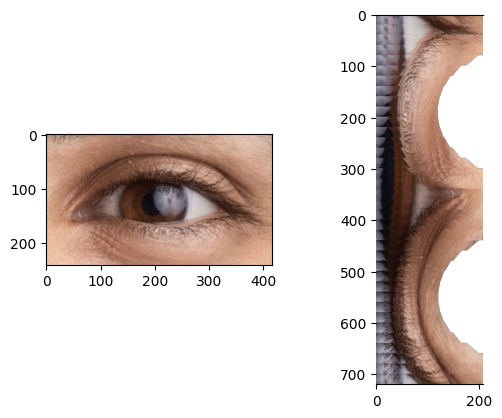

In [6]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")

interval_deg = 10
segments = EyeTraumaAnalysis.get_segments(
    img=image.img,
    interval_deg=interval_deg,
    wd_px=20,
    center=image.center, borderValue=(0,0,0,0) )
concatenated = np.vstack([segment for ind,segment in segments.items()])

fig, axs = plt.subplots(1,2)
axs[0].imshow(image.img);
axs[1].imshow(concatenated);
axs[1].spines["left"].set_visible(False)
axs[1].spines["right"].set_visible(False)

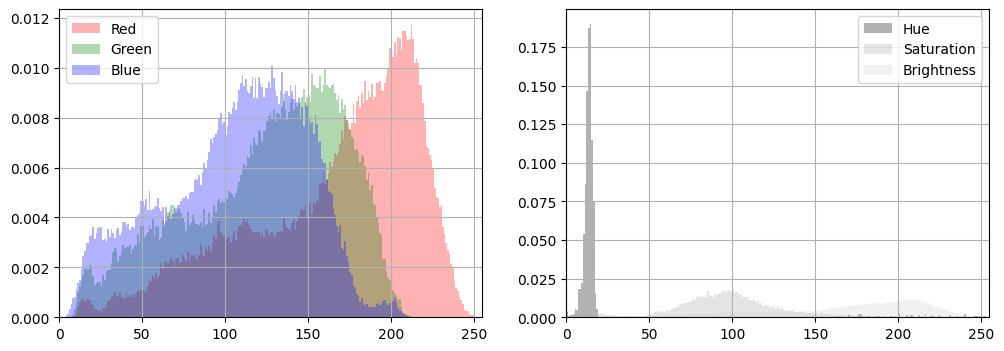

In [111]:
img_rgb = image.img
img_hsv = mpl.colors.rgb_to_hsv(image.img[...,:3]/255.0) * 255

fig, axs = plt.subplots(1, 2, sharex=True, figsize=(12,4))
axs[0].hist(img_rgb[...,0].ravel(),256,[0,256],density=True, alpha=.3, facecolor="red", label="Red");
axs[0].hist(img_rgb[...,1].ravel(),256,[0,256],density=True, alpha=.3, facecolor="green", label="Green");
axs[0].hist(img_rgb[...,2].ravel(),256,[0,256],density=True, alpha=.3, facecolor="blue", label="Blue");
axs[0].grid()
axs[0].set_xlim([0, 255]);
axs[0].legend();

axs[1].hist(img_hsv[...,0].ravel(),256,[0,256],density=True, alpha=.3, facecolor="black", label="Hue");
axs[1].hist(img_hsv[...,1].ravel(),256,[0,256],density=True, alpha=.3, facecolor="darkgray", label="Saturation");
axs[1].hist(img_hsv[...,2].ravel(),256,[0,256],density=True, alpha=.3, facecolor="lightgray", label="Brightness");
axs[1].grid()
axs[1].set_xlim([0, 255]);
axs[1].legend();


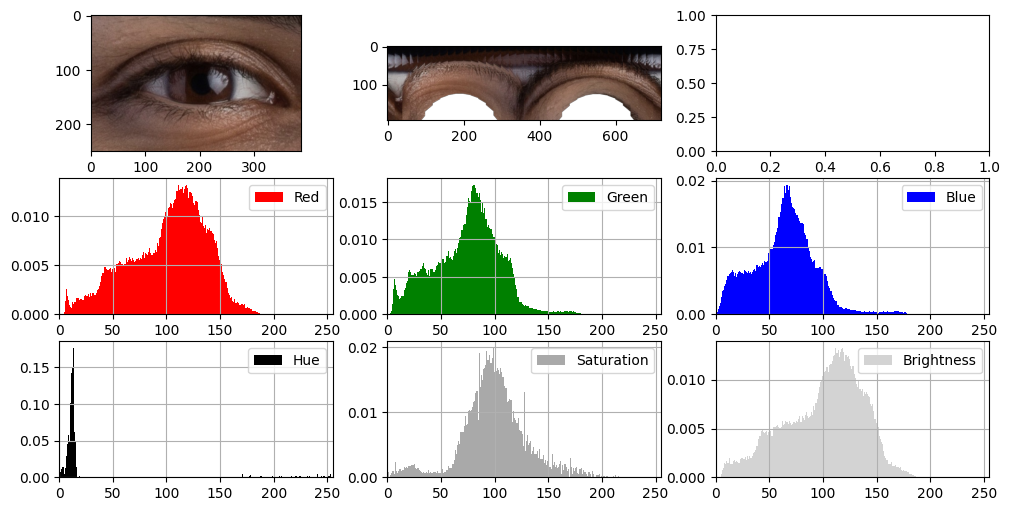

In [59]:
img_hsv = mpl.colors.rgb_to_hsv(image.img[...,:3]/255.0) * 255

fig, axs = plt.subplots(3, 3, figsize=(12,6))

axs[0,0].imshow(image.img)

axs[0,1].imshow(np.transpose(concatenated, axes=[1,0,2]))

axs[1,0].hist(image.img[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red");
axs[1,1].hist(image.img[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green");
axs[1,2].hist(image.img[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue");

axs[2,0].hist(img_hsv[...,0].ravel(),256,[0,256],density=True, facecolor="black", label="Hue");
axs[2,1].hist(img_hsv[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation");
axs[2,2].hist(img_hsv[...,2].ravel(),256,[0,256],density=True, facecolor="lightgray", label="Brightness");

for ind, ax in enumerate(axs[1:,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()

#plt.hist(img_hsv[...,0].ravel(),256,[0,256],density=True, alpha=.3, edgecolor="red", label="H");
#plt.hist(img_hsv[...,1].ravel(),256,[0,256],density=True, alpha=.3, edgecolor="green");



In [67]:
img_hsv1[100,0]

array([178.5       , 141.66666667,   9.        ])

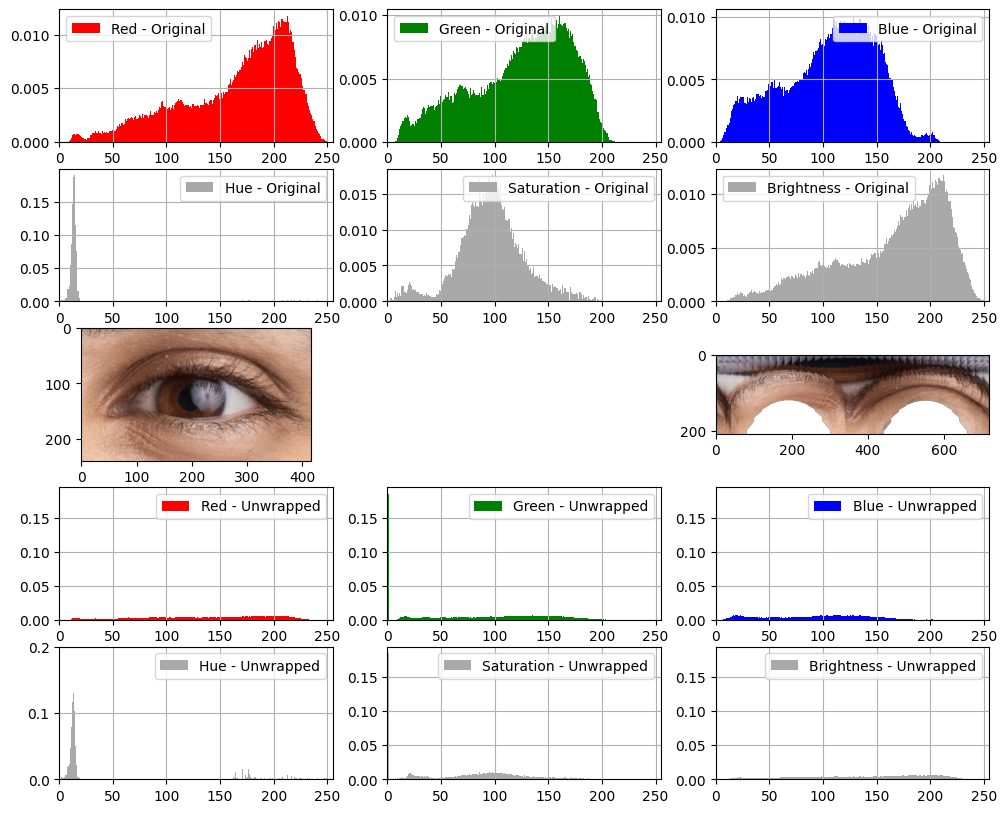

In [113]:
img_rgb1 = image.img
img_hsv1 = mpl.colors.rgb_to_hsv(img_rgb1[...,:3]/255.0) * 255

fig, axs = plt.subplots(5, 3, figsize=(12,10))

"""fig = plt.figure()
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=1)
ax2 = plt.subplot2grid((3, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((3, 2), (1, 0), colspan=2)
ax4 = plt.subplot2grid((3, 2), (2, 0), colspan=2)"""

axs[0,0].hist(img_rgb1[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red - Original");
axs[0,1].hist(img_rgb1[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green - Original");
axs[0,2].hist(img_rgb1[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue - Original");

axs[1,0].hist(img_hsv1[...,0].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Hue - Original");
axs[1,1].hist(img_hsv1[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation - Original");
axs[1,2].hist(img_hsv1[...,2].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Brightness - Original");

for ind, ax in enumerate(axs[:2,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()

axs[2,0].imshow(image.img)
axs[2,1].axis("off")
axs[2,2].imshow(np.transpose(concatenated, axes=[1,0,2]))

img_rgb2 = np.vstack([segment for ind,segment in segments.items()])
img_hsv2 = mpl.colors.rgb_to_hsv(img_rgb2[...,:3]/255.0) * 255

axs[3,0].hist(img_rgb2[...,0].ravel(),256,[0,256],density=True, facecolor="red", label="Red - Unwrapped");
axs[3,1].hist(img_rgb2[...,1].ravel(),256,[0,256],density=True, facecolor="green", label="Green - Unwrapped");
axs[3,2].hist(img_rgb2[...,2].ravel(),256,[0,256],density=True, facecolor="blue", label="Blue - Unwrapped");

axs[4,0].hist(img_hsv2[...,0].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Hue - Unwrapped");
axs[4,1].hist(img_hsv2[...,1].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Saturation - Unwrapped");
axs[4,2].hist(img_hsv2[...,2].ravel(),256,[0,256],density=True, facecolor="darkgray", label="Brightness - Unwrapped");

for ind, ax in enumerate(axs[3:,:].reshape(-1)):
    ax.grid()
    ax.set_xlim([0, 255])
    ax.legend()


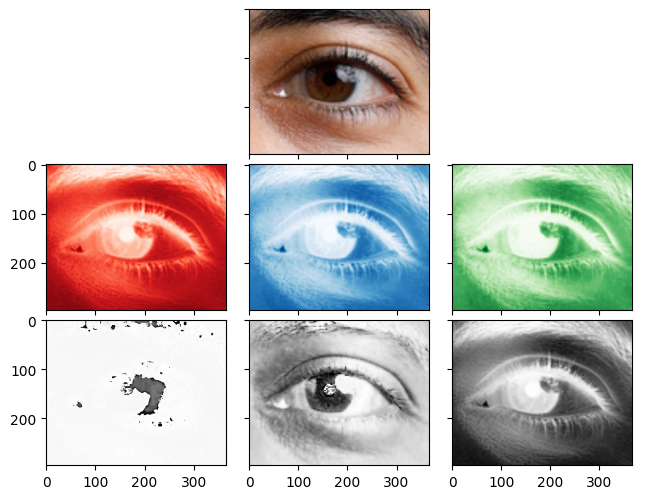

In [14]:
image = EyeTraumaAnalysis.Image("data/01_raw/11004.jpg")
img_rgb1 = image.img
img_hsv1 = mpl.colors.rgb_to_hsv(img_rgb1[...,:3]/255.0) * 255

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
axs[0,0].axis("off")
axs[0,1].imshow(img_rgb1)
axs[0,2].axis("off")

axs[1,0].imshow(img_rgb1[...,0], vmin=0, vmax=255, cmap="Reds");
axs[1,1].imshow(img_rgb1[...,1], vmin=0, vmax=255, cmap="Blues");
axs[1,2].imshow(img_rgb1[...,2], vmin=0, vmax=255, cmap="Greens");
axs[2,0].imshow(img_hsv1[...,0], vmin=0, vmax=255, cmap="Greys");
axs[2,1].imshow(img_hsv1[...,1], vmin=0, vmax=255, cmap="Greys");
axs[2,2].imshow(img_hsv1[...,2], vmin=0, vmax=255, cmap="Greys");

fig.tight_layout(pad=0)

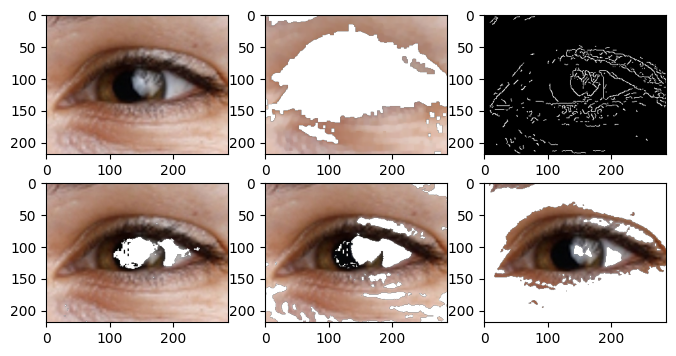

In [81]:

image = EyeTraumaAnalysis.Image("data/01_raw/11006.jpg")

img_hsv = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2HSV)
frame_threshold1 = cv2.inRange(img_hsv, (0, 0, 0), (30, 255,255))
target1 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold1)

frame_threshold2 = cv2.inRange(img_hsv, (0, 50, 0), (255, 255,255))
target2 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold2)

frame_threshold3 = cv2.inRange(img_hsv, (0, 0, 00), (255, 255,160))
target3 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold3)

fig, axs = plt.subplots(2, 3, figsize=(8,4))
axs[0,0].imshow(image.img)

axs[1,0].imshow(target1);
axs[1,1].imshow(target2);
axs[1,2].imshow(target3);

ht, wd, ch = img_hsv.shape;
bottom_region_hsv = img_hsv[int(ht*9/10):,:,:3]  # :3 removes alpha channel
percentiles = np.quantile(bottom_region_hsv,[0.01, 0.99], axis=[0,1])    #
frame_threshold = cv2.inRange(img_hsv, percentiles[0], percentiles[1])

target4 = cv2.bitwise_and(image.img,image.img, mask=frame_threshold)
kernel = np.ones((int(wd/50),int(ht/50)),np.uint8)
target4 = cv2.morphologyEx(target4, cv2.MORPH_OPEN, kernel)
target4 = cv2.morphologyEx(target4, cv2.MORPH_CLOSE, kernel)
axs[0,1].imshow(target4);
#axs[0,2].imshow(cv2.cvtColor(bottom_region_hsv, cv2.COLOR_HSV2RGB));
axs[0,2].imshow(cv2.Canny(image.img, threshold1=90, threshold2=100), cmap="gray");


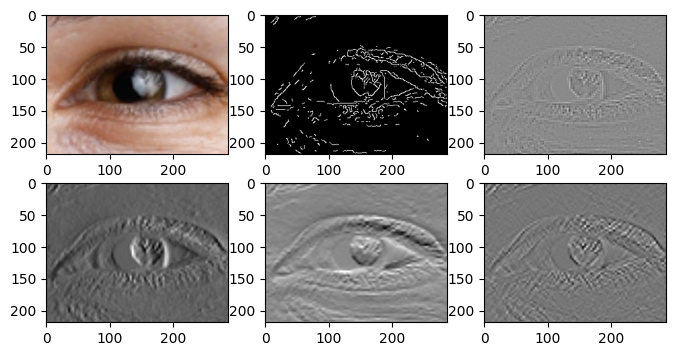

In [91]:
image = EyeTraumaAnalysis.Image("data/01_raw/11006.jpg")
img_hsv = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2HSV)
img_gray = cv2.cvtColor(image.img[...,:3], cv2.COLOR_RGB2GRAY)
#img_blur = cv2.GaussianBlur(img_gray, (4,4), 0)

fig, axs = plt.subplots(2, 3, figsize=(8,4))
axs[0,0].imshow(image.img)

laplacian = cv2.Laplacian(img_gray,cv2.CV_64F)
axs[0,1].imshow(cv2.Canny(image.img, threshold1=90, threshold2=100), cmap="gray");
axs[0,2].imshow(laplacian, cmap="gray");

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images

axs[1,0].imshow(sobelx, cmap="gray");
axs[1,1].imshow(sobely, cmap="gray");
axs[1,2].imshow(sobelxy, cmap="gray");
#axs[0,2].imshow(cv2.cvtColor(bottom_region_hsv, cv2.COLOR_HSV2RGB));



In [51]:
zimage.img[frame_threshold]

IndexError: index 255 is out of bounds for axis 0 with size 238

In [46]:
percentiles = np.quantile(bottom_region,[0.1, 0.9], axis=[0,1])
cv2.inRange()

array([179., 122., 110.])

In [18]:
ht

380